# Bulgaria

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

pd.options.mode.chained_assignment = None
%config InlineBackend.figure_format = 'retina'

## Fetch results

In [9]:
df = pd.read_csv('/Users/robinlinderborg/Downloads/csv/protocols.txt', sep=';')

In [11]:
df

,8,010100001,1,|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046,600,593,24,382,337,45,...,45.1,11,371,366,321,45.2,5,5.1,0.3,11.1
0,1,10100002,1,|4010123|4010123|4010123|4010123|4010123|40101...,600,580,3,362,NaN,NaN,...,NaN,13,349,336,NaN,NaN,13,NaN,NaN,13
1,1,10100003,1,|4010124|4010124|4010124|4010124|4010124|40101...,600,521,2,275,NaN,NaN,...,NaN,9,266,255,NaN,NaN,11,NaN,NaN,8
2,8,10100004,1,|3010045|3010045|3010045|3010045|3010045|30100...,600,586,4,342,266.0,76.0,...,76.0,11,331,315,240.0,75.0,16,15.0,1.0,5
3,1,10100005,1,|4010125|4010125|4010125|4010125|4010125|40101...,500,497,29,353,NaN,NaN,...,NaN,7,346,335,NaN,NaN,11,NaN,NaN,4
4,1,10100006,1,|4010121|4010121|4010121|4010121|4010121|40101...,500,484,2,280,NaN,NaN,...,NaN,11,269,258,NaN,NaN,11,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7,326100187,32,|6320054|6320054|6320054|6320054|6320054|63200...,800,43,323,358,NaN,NaN,...,NaN,13,345,337,NaN,NaN,8,NaN,NaN,5
12218,7,326200188,32,|6320122|6320122|6320122|6320122|6320122|63201...,200,23,51,64,NaN,NaN,...,NaN,0,64,61,NaN,NaN,3,NaN,NaN,0
12219,7,326200189,32,|6320123|6320123|6320123|6320123|6320123|63201...,200,29,80,105,NaN,NaN,...,NaN,3,102,99,NaN,NaN,3,NaN,NaN,1
12220,7,326300190,32,|6320119|6320119|6320119|6320119|6320119|63201...,500,12,111,121,NaN,NaN,...,NaN,1,120,118,NaN,NaN,2,NaN,NaN,0


In [ ]:
no,section_id,admin_id,serial_nums,num_ballots,num_voters_1,num_voters_2,num_voters_3,num_unused_ballots,num_ballots_destroyed,num_invalid_ballots_1,num_invalid_ballots_2,num_invalid_ballots_3,num_wrong_ballots,num_ballots_found,num_invalid_votes_found,num_ballots_found_box,

In [ ]:

17) 5. Number of ballots found in the ballot box
20) 6. Number of invalid votes (ballots) found in the ballot box
21) 7. Total number found in the ballot box actual voices
       (bulletins)
22) 7.1 number of actual votes cast for the candidate lists of
       parties, coalitions and initiative committees
25) 7.2 number of actual votes (marks) in the box only
       "I'm not rooting for anyone"
28) 9. Ballots in which the voter's vote is not marked (empty
       ballots), ballots in which more than one square was voted;
       ballots in which the vote of
       voter and other types of invalid votes

In [10]:
df

,8,010100001,1,|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046|3010046,600,593,24,382,337,45,...,45.1,11,371,366,321,45.2,5,5.1,0.3,11.1
0,1,10100002,1,|4010123|4010123|4010123|4010123|4010123|40101...,600,580,3,362,NaN,NaN,...,NaN,13,349,336,NaN,NaN,13,NaN,NaN,13
1,1,10100003,1,|4010124|4010124|4010124|4010124|4010124|40101...,600,521,2,275,NaN,NaN,...,NaN,9,266,255,NaN,NaN,11,NaN,NaN,8
2,8,10100004,1,|3010045|3010045|3010045|3010045|3010045|30100...,600,586,4,342,266.0,76.0,...,76.0,11,331,315,240.0,75.0,16,15.0,1.0,5
3,1,10100005,1,|4010125|4010125|4010125|4010125|4010125|40101...,500,497,29,353,NaN,NaN,...,NaN,7,346,335,NaN,NaN,11,NaN,NaN,4
4,1,10100006,1,|4010121|4010121|4010121|4010121|4010121|40101...,500,484,2,280,NaN,NaN,...,NaN,11,269,258,NaN,NaN,11,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7,326100187,32,|6320054|6320054|6320054|6320054|6320054|63200...,800,43,323,358,NaN,NaN,...,NaN,13,345,337,NaN,NaN,8,NaN,NaN,5
12218,7,326200188,32,|6320122|6320122|6320122|6320122|6320122|63201...,200,23,51,64,NaN,NaN,...,NaN,0,64,61,NaN,NaN,3,NaN,NaN,0
12219,7,326200189,32,|6320123|6320123|6320123|6320123|6320123|63201...,200,29,80,105,NaN,NaN,...,NaN,3,102,99,NaN,NaN,3,NaN,NaN,1
12220,7,326300190,32,|6320119|6320119|6320119|6320119|6320119|63201...,500,12,111,121,NaN,NaN,...,NaN,1,120,118,NaN,NaN,2,NaN,NaN,0


In [2]:
# As listed on website
provinces = [
    'Blagoevgrad',
    'Burgas',
    'Varna',
    'Veliko Tarnovo',
    'Vidin',
    'Vratsa',
    'Gabrovo',
    'Dobrich',
    'Kardzhali',
    'Kyustendil',
    'Lovech',
    'Montana',
    'Pazardzhik',
    'Pernik',
    'Pleven',
    'Plovdiv Town',
    'Plovdiv District',
    'Razgrad',
    'Ruse',
    'Silistra',
    'Sliven',
    'Smolyan',
    'Sofia 23 ИР',
    'Sofia 24 ИР',
    'Sofia 25 IR',
    'Sofia District',
    'Stara Zagora',
    'Targovishte',
    'Haskovo',
    'Shumen',
    'Yambol'
]

In [3]:
def get_turnout(url):
    r = requests.get(url)
    html = BeautifulSoup(r.text)
    script = html.select('script')[1].text
    turnout = script.split('chart\', [')[1].split(']')[0]
    turnout = turnout.split(',')[-1]
    return float(turnout)

In [4]:
base_url = 'http://results.cik.bg/ep2014/aktivnost'
turnouts = []
for num in range(1, 32):
    url = f'{base_url}/{str(num).zfill(2)}.html'
    turnouts.append(get_turnout(url))

In [24]:
df = pd.DataFrame({'province': provinces, 'turnout': turnouts})

In [25]:
df.to_csv('../../data/raw/bgr.csv', index=False)

In [2]:
df = pd.read_csv('../../data/raw/bgr.csv')

## Merge

In [3]:
df.province = df.province.replace('Plovdiv District', 'Plovdiv')
df.province = df.province.replace('Sofia District', 'Sofia')

In [4]:
geo = gpd.read_file('../../data/shapefiles/bgr/BGR_adm1.shp')

In [5]:
geo[~geo.NAME_1.isin(df.province)]

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
4,37,BGR,Bulgaria,5,Grad Sofiya,Oblast,Province,София-град,None,"POLYGON ((23.64644241333013 42.82651519775402,..."


In [6]:
geo = geo.merge(df, left_on='NAME_1', right_on='province', how='left')

In [7]:
# Sofia numbers, calculated by adding up the three parts
(113979 + 150314 + 113009) / (334830 + 384957 + 357000)

0.35039613219698973

In [8]:
# From number above
geo.turnout = geo.turnout.fillna(35.04)

In [9]:
geo = geo[['NAME_1', 'geometry', 'turnout']]
geo = geo.rename(columns={'NAME_1': 'name'})

## Export

In [10]:
geo['country'] = 'bgr'

In [12]:
geo.to_file('../../data/processed/bgr')

## Visualize

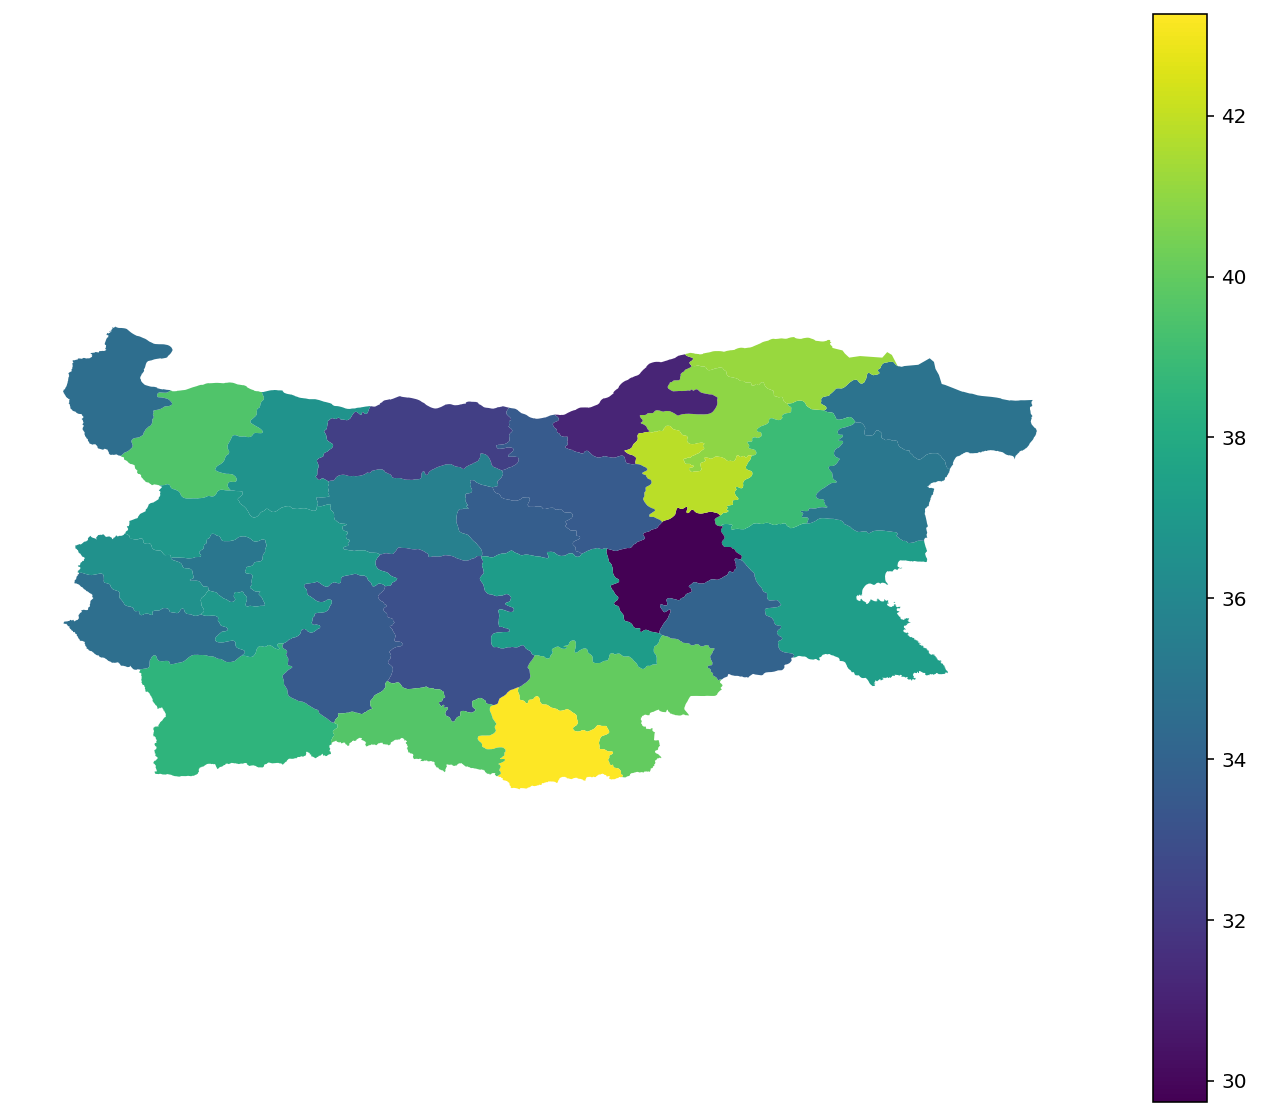

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

geo.plot(column='turnout', legend=True, ax=ax);
ax.set_axis_off()

fig.set_facecolor('#ffffff')
fig.savefig('../../reports/bgr_choropleth.png')